<a href="https://colab.research.google.com/github/Audrey-ai/Electric-Car-Sharing-Data-Analysis/blob/main/Python_Notebook_IP_WEEK_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing our pandas library
import pandas as pd

#Importing our numpy library
import numpy as np


In [ ]:
#Uplading the Autolib dataset to use in our project and displaying first few rows 
df = pd.read_csv("Autolib_dataset.csv")
df.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


In [ ]:
#Checking on the general information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

In [ ]:
#Data cleaning
#Checking for Data Validity - Irrelevant columns
#Dropping the Displayed comment and Geo point culumns as we will not be needing them in our analysis

df.drop(["Displayed comment", "Geo point"], axis = 1, inplace = True)
df.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


In [ ]:
#Checking for data accuracy
#I notice a few car rows have only bluecar record and I confirm if this is true for all data

df[(df['Cars']) == (df['Bluecar counter'])]  #This returns all rows which means the car column only has blue car counter

#I will create a new column for Cars to accomodate bluecars, utilib and utilib 1.4 counters
df["Total_Cars"] = (df['Bluecar counter']) + (df['Utilib counter']) + (df['Utilib 1.4 counter'])
df.head()           

#A new column with total cars is displayed

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute,Total_Cars
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43,0
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24,6
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14,5
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37,4
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23,3


In [ ]:
#Checking for data accuracy
#Checking whether the different columns with categories have the right categories and no mix up

print(pd.unique(df['Charging Status']))
print(pd.unique(df['Kind']))
print(pd.unique(df['Rental status']))
print(pd.unique(df['Station type']))
print(pd.unique(df['Subscription status']))

#The records are correct as per categories outlined in dataset description

['nonexistent' 'operational' 'broken']
['STATION' 'PARKING' 'SPACE' 'CENTER']
['operational' 'broken' 'future' 'nonexistent']
['station' 'full_station' 'subs_center']
['nonexistent' 'operational' 'broken']


In [ ]:
#Checking on data completeness
#Finding out if there are any missing values
df.isnull().any()

#We notice that only the Scheduled at column has missing values


Address                False
Cars                   False
Bluecar counter        False
Utilib counter         False
Utilib 1.4 counter     False
Charge Slots           False
Charging Status        False
City                   False
ID                     False
Kind                   False
Postal code            False
Public name            False
Rental status          False
Scheduled at            True
Slots                  False
Station type           False
Status                 False
Subscription status    False
year                   False
month                  False
day                    False
hour                   False
minute                 False
Total_Cars             False
dtype: bool

In [ ]:
#We notice that only the Scheduled at column has missing values
#We check on the quantity of missing values across this column
df['Scheduled at'].isnull().sum()    #This column has 4953 missing values

#Checking on the values that are not missing and if there were are no parking slots at this time
not_missing = df['Scheduled at'].notnull()
df[['Scheduled at','Slots']][not_missing]

,Scheduled at,Slots
200,2016-07-27T15:32:21,0
271,2016-07-05T13:10:09,0
303,2015-09-29T13:58:29,0
497,2015-09-29T13:58:29,0
925,2016-07-27T15:32:21,0
1095,2016-07-27T15:32:21,0
1152,2016-04-26T14:28:01,0
1243,2016-07-27T15:32:21,0
1265,2012-09-17T08:57:28,0
1300,2015-09-29T13:58:29,0


In [ ]:
#Since the time frame of the schedule is not within our time range and no slots are at these times 
#I drop the Scheduled at column

df.drop(['Scheduled at'],axis=1,inplace=True)
df.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute,Total_Cars
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43,0
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24,6
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,4,3,20,14,5
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37,4
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23,3


In [ ]:
#Checking for data consistency 
#Checking for any duplicates in data

df.duplicated().any()         #There are no duplicates in our data

False

In [ ]:
#Data cleaning : Data uniformity
#Converting the data type of Postal code

df['Postal code'] = df['Postal code'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   ID                   5000 non-null   object
 9   Kind                 5000 non-null   object
 10  Postal code          5000 non-null   object
 11  Public name          5000 non-null   object
 12  Rental status        5000 non-null   object
 13  Slots                5000 non-null   int64 
 14  Station type         5000 non-null   object
 15  Status               5000 non-null   object
 16  Subscr

In [ ]:
#Data uniformity - Converting of columns year,month,day to datetime
#Creating date column from year,month and day columns of our data

import datetime
df['Date'] = pd.to_datetime(df[['year','month','day']])
df

#Dropping the three columns (year, month, day)
df.drop(df[['year','month','day']], axis=1, inplace=True)
df.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,hour,minute,Total_Cars,Date
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,11,43,0,2018-04-08
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,7,24,6,2018-04-06
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,20,14,5,2018-04-03
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,4,37,4,2018-04-04
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,17,23,3,2018-04-08


In [ ]:
#Data uniformity - Data conversion and creating new column for time
#Creating time from hour and minute columns of our data 
#Since the data type of the two columns is integer we convert to string
df['Time'] = (pd.to_datetime(df['hour'].astype(str) + ':' + df['minute'].astype(str), format='%H:%M').dt.time)
df.head()


,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,hour,minute,Total_Cars,Date,Time
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,11,43,0,2018-04-08,11:43:00
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,7,24,6,2018-04-06,07:24:00
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,20,14,5,2018-04-03,20:14:00
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,4,37,4,2018-04-04,04:37:00
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,17,23,3,2018-04-08,17:23:00


Cars                   0.0
Bluecar counter        0.0
Utilib counter         0.0
Utilib 1.4 counter     0.0
Charge Slots           0.0
Slots                  0.0
hour                   6.0
minute                14.0
Total_Cars             0.0
Name: 0.25, dtype: float64
Cars                   4.0
Bluecar counter        4.0
Utilib counter         0.0
Utilib 1.4 counter     0.0
Charge Slots           0.0
Slots                  3.0
hour                  18.0
minute                44.0
Total_Cars             4.0
Name: 0.75, dtype: float64
Cars                   4.0
Bluecar counter        4.0
Utilib counter         0.0
Utilib 1.4 counter     0.0
Charge Slots           0.0
Slots                  3.0
hour                  12.0
minute                30.0
Total_Cars             4.0
dtype: float64


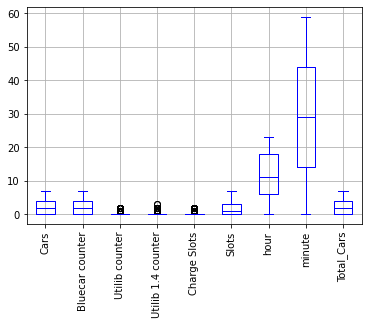

In [ ]:
#Checking for outliers
import matplotlib.pyplot as plt 
% matplotlib inline 

#Plotting a box plot
df.boxplot(color='Blue',rot=90, grid=True)

#From the below image I wouldn't consider the values in Utilib counter,Utilib 1.4 counter and charge slots
#as outliers this is because when checking on the 1st and 3rd quantile and the interquantile range it is a spread arond zero
#for these three columns because most of the values are zero.

#I WILL RETAIN ALL OBSERVATIONS FOR THESE COLUMNS SHOWING OUTLIERS ON THE PLOT

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR = Q3-Q1

print(Q1)
print(Q3)
print(IQR)

In [ ]:
#Sorting data by date and public name columns

df = df.sort_values(['Date','Public name'])
df.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,hour,minute,Total_Cars,Date,Time,Bluecar_diff
1843,16 Rue Charles de Gaulle,4,4,0,0,0,nonexistent,Alfortville,alfortville-charlesdegaulle-16,STATION,94140,Alfortville/Charles de Gaulle/16,operational,0,station,ok,nonexistent,1,36,4,2018-04-01,01:36:00,0.0
4424,16 Rue Charles de Gaulle,2,2,0,0,0,nonexistent,Alfortville,alfortville-charlesdegaulle-16,STATION,94140,Alfortville/Charles de Gaulle/16,operational,0,station,ok,nonexistent,0,36,2,2018-04-01,00:36:00,-4.0
2724,22 place de l'Europe,0,0,0,0,0,nonexistent,Alfortville,alfortville-europe-22,STATION,94140,Alfortville/Europe/22,broken,0,station,closed,nonexistent,15,11,0,2018-04-01,15:11:00,0.0
2016,17 allÃ©e Jean-Baptiste Preux,6,6,0,0,0,nonexistent,Alfortville,alfortville-jeanbaptistepreux-17,STATION,94140,Alfortville/Jean-Baptiste Preux/17,operational,0,station,ok,nonexistent,5,24,6,2018-04-01,05:24:00,4.0
269,1bis Avenue Joseph Franceschi,5,5,0,0,0,nonexistent,Alfortville,alfortville-josephfranceschi-1,STATION,94140,Alfortville/Joseph Franceschi/1,operational,0,station,ok,nonexistent,23,0,5,2018-04-01,23:00:00,0.0


In [ ]:
#Creating a new folder with differences in blue cars per station to help find out the picking and returning times of cars
df['Bluecar_diff'] = df.groupby(['Public name'])['Bluecar counter'].diff().fillna(0)
df.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,hour,minute,Total_Cars,Date,Time,Bluecar_diff
1843,16 Rue Charles de Gaulle,4,4,0,0,0,nonexistent,Alfortville,alfortville-charlesdegaulle-16,STATION,94140,Alfortville/Charles de Gaulle/16,operational,0,station,ok,nonexistent,1,36,4,2018-04-01,01:36:00,0.0
4424,16 Rue Charles de Gaulle,2,2,0,0,0,nonexistent,Alfortville,alfortville-charlesdegaulle-16,STATION,94140,Alfortville/Charles de Gaulle/16,operational,0,station,ok,nonexistent,0,36,2,2018-04-01,00:36:00,-2.0
2724,22 place de l'Europe,0,0,0,0,0,nonexistent,Alfortville,alfortville-europe-22,STATION,94140,Alfortville/Europe/22,broken,0,station,closed,nonexistent,15,11,0,2018-04-01,15:11:00,0.0
2016,17 allÃ©e Jean-Baptiste Preux,6,6,0,0,0,nonexistent,Alfortville,alfortville-jeanbaptistepreux-17,STATION,94140,Alfortville/Jean-Baptiste Preux/17,operational,0,station,ok,nonexistent,5,24,6,2018-04-01,05:24:00,0.0
269,1bis Avenue Joseph Franceschi,5,5,0,0,0,nonexistent,Alfortville,alfortville-josephfranceschi-1,STATION,94140,Alfortville/Joseph Franceschi/1,operational,0,station,ok,nonexistent,23,0,5,2018-04-01,23:00:00,0.0


In [ ]:
#Identify the most popular hour of the day for picking up a shared electric car (Bluecar) 
#in the city of Paris over the month of April 2018.

Picking = df[df['Bluecar_diff'] > 0]
Picking

Picking[(Picking['City'] == 'Paris')].hour.mode()

0    21
dtype: int64

In [ ]:
#Finding the most popular hour for returning blue cars
Returning = df[df['Bluecar_diff'] < 0]
Returning

Returning.hour.mode()


0    18
1    19
dtype: int64

In [ ]:
##Finding the most popular station overall

df['Public name'].mode() [df['Kind']=='STATION']

0    Paris/Porte de Montrouge/8
dtype: object

In [ ]:
#Finding the most popular station at most picking hour

Picking['Public name'].mode()


0    Paris/Philippe Auguste/126
dtype: object

In [ ]:
#Finding postal code that is most popular for picking up blue cars

Picking['Postal code'].mode()

0    75015
1    75016
dtype: object

In [ ]:
#Finding which postal code is the most popular overall

df['Postal code'].mode()

0    75015
dtype: object

In [ ]:
#Finding if the most popular station for cars belongs to the most popular Postal code for picking up blue cars

df['Postal code'][df['Public name'] == 'Paris/Porte de Montrouge/8'].head(1)

#That is not the case

2112    75014
Name: Postal code, dtype: object

In [ ]:
#Finding the most popular postal code for picking up Utilib cars

#First creating a column of differences to find out which were the picing and returning hours based on the stations
df['Utilibcounter_diff'] = df['Utilib counter'].diff()
df

#The below code prints out the picking times for Utilib cars
Picking_Utilib = df[df['Utilibcounter_diff'] > 0]

#Finding the most popular Postal codes for picking up Utilib cars

Picking_Utilib['Postal code'].mode()   #This returns two Postal codes : 75016 and 75017

#Finding if the most popular station for cars belongs to the most popular Postal code for picking up Utilib cars

df['Postal code'][df['Public name'] == 'Paris/Porte de Montrouge/8'].head(1)


#That is not the case for Utilib cars as we get postal code of 75014

2112    75014
Name: Postal code, dtype: object

In [ ]:
#Finding the most popular postal code for picking up Utilib 1.4 cars

#First creating a column of differences to find out which were the picing and returning hours based on the stations
df['Utilibcounter1.4_diff'] = df['Utilib 1.4 counter'].diff()
df

#The below code prints out the picking times for Utilib 1.4 cars
Picking_Utilib14 = df[df['Utilibcounter1.4_diff'] > 0]

#Finding the most popular Postal codes for picking up Utilib 1.4 cars

Picking_Utilib14['Postal code'].mode()   #This returns Postal code : 75017

#Finding if the most popular station for cars belongs to the most popular Postal code for picking up Utilib 1.4 cars

df['Postal code'][df['Public name'] == 'Paris/Porte de Montrouge/8'].head(1)


#That is not the case for Utilib 1.4 cars as we get postal code of 75014

2112    75014
Name: Postal code, dtype: object